# Regression

In [1]:
# import libraries

import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import skew, norm
from sklearn.model_selection import train_test_split

import lightgbm as lgb


In [2]:
import warnings

def ignore_warnings(*wargs, **kwargs):
    pass

warnings.warn = ignore_warnings

In [3]:
# load csv file 
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# dataframe desciption (count, mean, etc)
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# check column's data-type and null value presence
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# total null values in columns
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

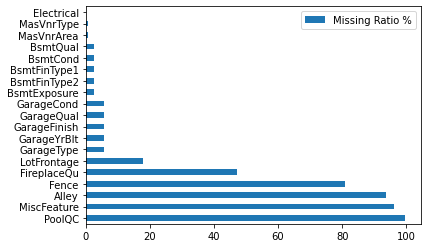

In [8]:
# plot columns with % of null values
def plot_nas(df):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' : na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(df)

In [9]:
df.drop('Id', axis = 1, inplace=True)
print("Shape of teh dataframe is : {}".format(df.shape))

Shape of teh dataframe is : (1460, 80)


In [10]:
# fill null with 0 for numerical columns
for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        df[i] = df[i].fillna(0)

In [11]:
# fill object columns having null values less than 5 with mode()
for col in df.columns:
    if df[col].isnull().sum() <= 5:
        df[col] = df[col].fillna(df[col].mode()[0])

In [12]:
# for example in "Electrical" column, SBrkr is most commonly used and had one null value which is replaced with SBrkr
df['Electrical']

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    FuseA
1459    SBrkr
Name: Electrical, Length: 1460, dtype: object

In [13]:
# for object columns with higher number of null values, 'None' is inserted
for col in df.columns:
    if df[col].dtype == 'O':
        if df[col].isnull().sum() > 5:
            df[col] = df[col].fillna('None')

In [14]:
# To check if there is any missing data

df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data.head()

,Missing Ratio


<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

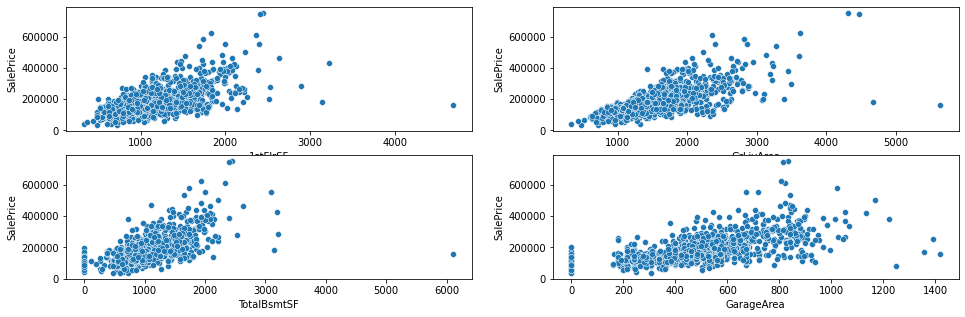

In [15]:
#visualizing square footage of (home,lot,above and basement)
fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(df['1stFlrSF'], df['SalePrice'])
fig.add_subplot(2,2,2)
sns.scatterplot(df['GrLivArea'],df['SalePrice'])
fig.add_subplot(2,2,3)
sns.scatterplot(df['TotalBsmtSF'],df['SalePrice'])
fig.add_subplot(2,2,4)
sns.scatterplot(df['GarageArea'],df['SalePrice'])

In [16]:
# Outlier removal from target
def scatter_plot(x,y):
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.show

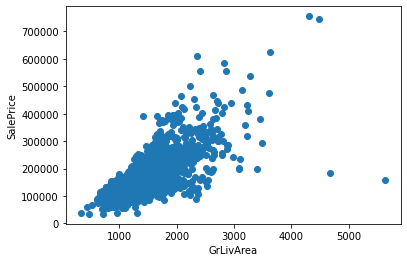

In [17]:
scatter_plot(df['GrLivArea'], df['SalePrice'])

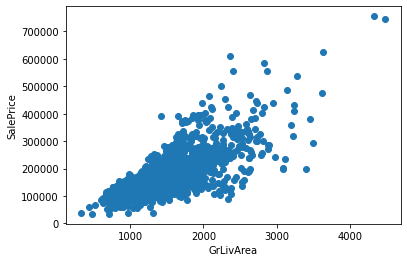

In [18]:
# we can see outlier presence from the plot above which indicates the presence of low sale price for large area
# which don't conform to the rest of data pattern. So we will remove it
df = df.drop(df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000)].index)

scatter_plot(df['GrLivArea'], df['SalePrice'])

In [19]:
# Correlation
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.219970,-0.142033,0.032522,-0.059275,0.027757,0.040503,0.023423,-0.074434,-0.065624,...,-0.012681,-0.006659,-0.012002,-0.043813,-0.026004,0.008090,-0.007675,-0.013581,-0.021386,-0.084276
LotFrontage,-0.219970,1.000000,0.071830,0.162430,-0.051150,0.029640,0.072958,0.082869,0.014343,-0.007595,...,-0.023401,0.044665,0.030316,0.024757,0.025236,0.058184,-0.060262,0.027550,-0.012162,0.215265
LotArea,-0.142033,0.071830,1.000000,0.091392,-0.002723,0.007462,0.007500,0.083715,0.175320,0.114297,...,0.168621,0.061861,-0.016505,0.021362,0.045288,0.036491,0.039072,0.005744,-0.013699,0.268179
OverallQual,0.032522,0.162430,0.091392,1.000000,-0.090442,0.571368,0.549827,0.398785,0.222467,-0.058324,...,0.236753,0.297186,-0.113176,0.030991,0.066298,0.044758,-0.031238,0.072531,-0.026575,0.795774
OverallCond,-0.059275,-0.051150,-0.002723,-0.090442,1.000000,-0.375572,0.074615,-0.124261,-0.042987,0.040034,...,-0.002675,-0.029800,0.070120,0.025426,0.054632,0.002321,0.068728,-0.003735,0.043795,-0.077948
YearBuilt,0.027757,0.029640,0.007462,0.571368,-0.375572,1.000000,0.592105,0.308722,0.249818,-0.048683,...,0.223700,0.184116,-0.387093,0.031578,-0.049972,-0.005171,-0.034273,0.012975,-0.013250,0.523608
YearRemodAdd,0.040503,0.072958,0.007500,0.549827,0.074615,0.592105,1.000000,0.172590,0.123039,-0.067377,...,0.204591,0.222790,-0.193551,0.045504,-0.038360,-0.003426,-0.010160,0.022020,0.036145,0.507717
MasVnrArea,0.023423,0.082869,0.083715,0.398785,-0.124261,0.308722,0.172590,1.000000,0.235545,-0.070533,...,0.156812,0.101698,-0.109126,0.019933,0.064258,-0.020350,-0.029346,-0.005006,-0.007215,0.477810
BsmtFinSF1,-0.074434,0.014343,0.175320,0.222467,-0.042987,0.249818,0.123039,0.235545,1.000000,-0.049622,...,0.204993,0.072717,-0.103853,0.029177,0.068389,0.052981,0.004741,-0.004281,0.015767,0.409384
BsmtFinSF2,-0.065624,-0.007595,0.114297,-0.058324,0.040034,-0.048683,-0.067377,-0.070533,-0.049622,1.000000,...,0.068312,0.004974,0.036406,-0.030041,0.088774,0.046350,0.004905,-0.015362,0.031618,-0.011422


<AxesSubplot:>

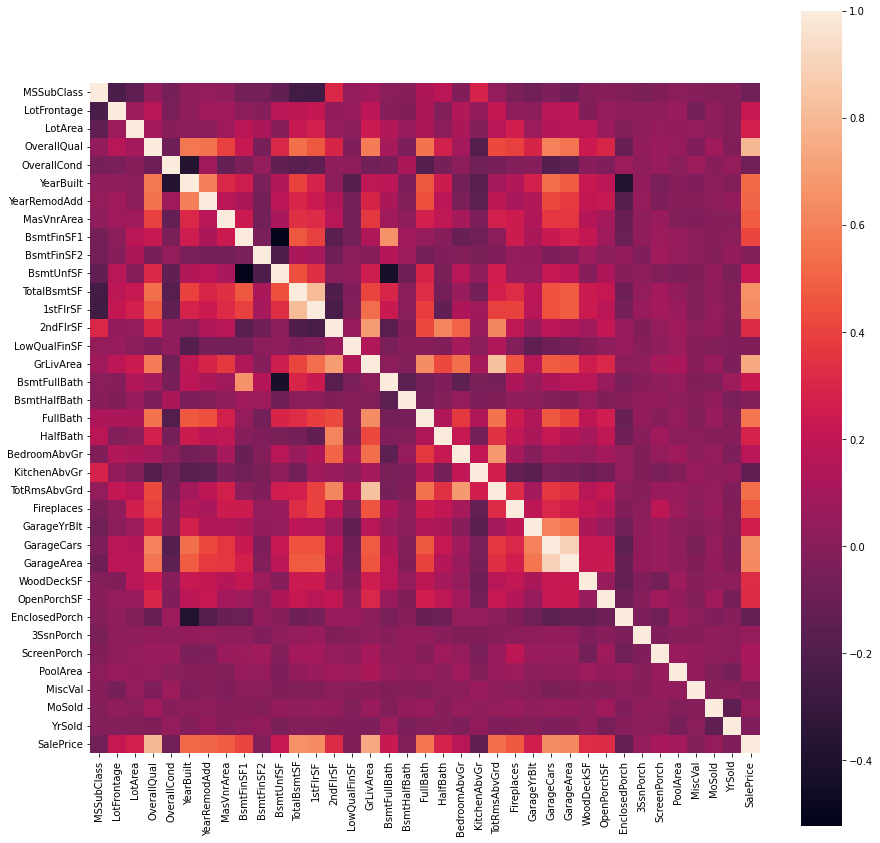

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), square=True)

In [21]:
df.corrwith(df["SalePrice"])


MSSubClass      -0.084276
LotFrontage      0.215265
LotArea          0.268179
OverallQual      0.795774
OverallCond     -0.077948
YearBuilt        0.523608
YearRemodAdd     0.507717
MasVnrArea       0.477810
BsmtFinSF1       0.409384
BsmtFinSF2      -0.011422
BsmtUnfSF        0.214460
TotalBsmtSF      0.651153
1stFlrSF         0.631530
2ndFlrSF         0.320532
LowQualFinSF    -0.025625
GrLivArea        0.734968
BsmtFullBath     0.228459
BsmtHalfBath    -0.016881
FullBath         0.562165
HalfBath         0.284590
BedroomAbvGr     0.168245
KitchenAbvGr    -0.135946
TotRmsAbvGrd     0.537769
Fireplaces       0.469862
GarageYrBlt      0.261435
GarageCars       0.641047
GarageArea       0.629217
WoodDeckSF       0.324758
OpenPorchSF      0.321142
EnclosedPorch   -0.128646
3SsnPorch        0.044568
ScreenPorch      0.111415
PoolArea         0.099490
MiscVal         -0.021203
MoSold           0.046124
YrSold          -0.028882
SalePrice        1.000000
dtype: float64

Text(0.5, 1.0, 'Features Correlating with Sales Price')

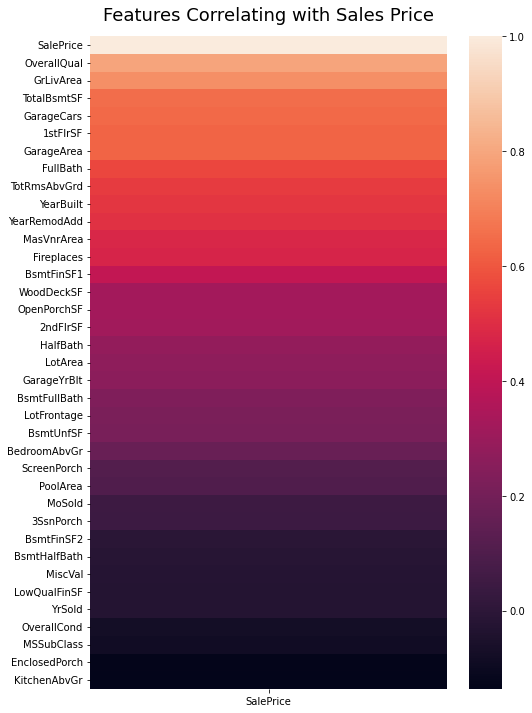

In [22]:
plt.figure(figsize=(8, 12))

heatmap = sns.heatmap(df.corr()[["SalePrice"]].sort_values(by='SalePrice', ascending=False))
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16)


 mu = 180932.92 and sigma = 79467.79



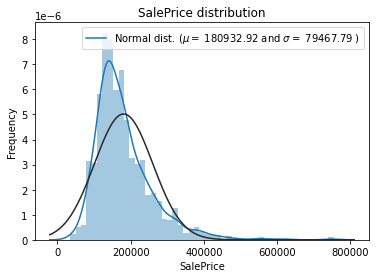

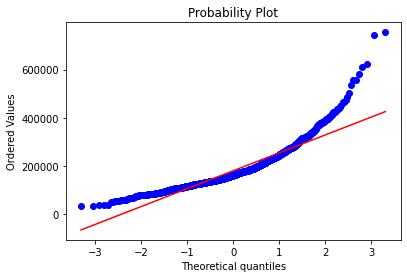

In [23]:
sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot to observe the distribution
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



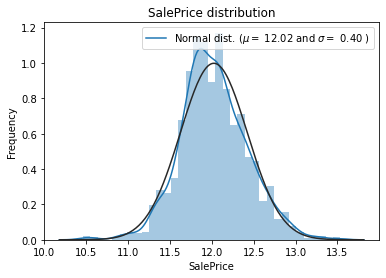

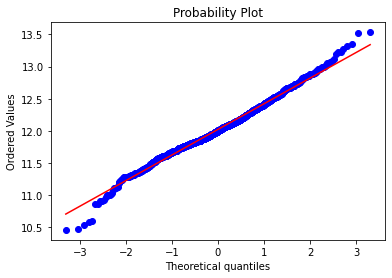

In [24]:
# use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["SalePrice"] = np.log1p(df["SalePrice"])

#Check the new distribution 
sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

In [25]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [26]:
# transform numerical variable which represents category
col = ['MSSubClass','OverallCond','YrSold','MoSold']
for i in col:
    df[i]=df[i].apply(str)

In [27]:
# Label Encode categorical vriables
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'O':
        encoder.fit(list(df[col].values))
        df[col] = encoder.transform(list(df[col].values))

print("Transformed data shape {}".format(df.shape))

Transformed data shape (1458, 81)


In [28]:
# #check for data skewness

# numeric_data = df.dtypes[df.dtypes != "object"].index

# # Check the skew of all numerical features
# skewed_data = df[numeric_data].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
# print("\nSkew in numerical features: \n")
# skewness = pd.DataFrame({'Skew' :skewed_data})
# skewness

Text(0.5, 1.0, 'Features Correlating with Sales Price')

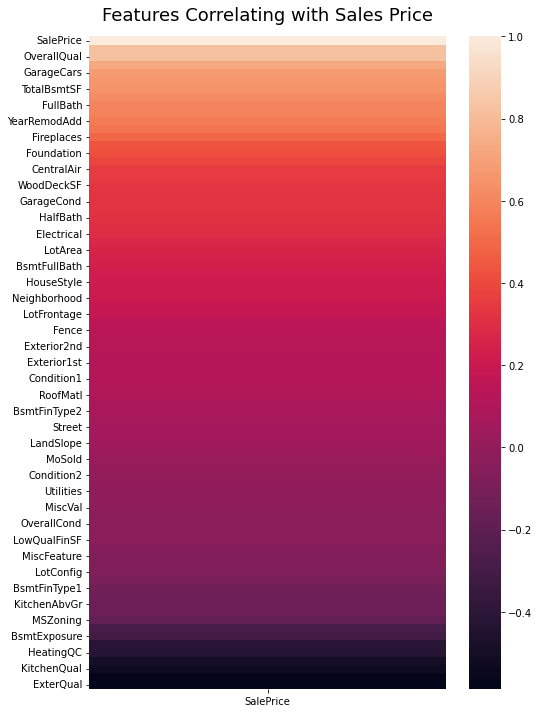

In [29]:
# plot correlation after feature engineering to check the relation of features with target
plt.figure(figsize=(8, 12))

heatmap = sns.heatmap(df.corr()[["SalePrice"]].sort_values(by='SalePrice', ascending=False))
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16)

In [30]:
df_train_test = df.drop(['SalePrice'], axis=1)
df_target = df['SalePrice']

In [31]:
df_target

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1458, dtype: float64

In [32]:
df_train_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,9,3,65.0,8450,1,1,3,3,0,4,...,0,3,4,1,0,4,2,8,4,2566
1,4,3,80.0,9600,1,1,3,3,0,2,...,0,3,4,1,0,7,1,8,4,2524
2,9,3,68.0,11250,1,1,0,3,0,4,...,0,3,4,1,0,11,2,8,4,2706
3,10,3,60.0,9550,1,1,0,3,0,0,...,0,3,4,1,0,4,0,8,0,2473
4,9,3,84.0,14260,1,1,0,3,0,2,...,0,3,4,1,0,3,2,8,4,3343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,9,3,62.0,7917,1,1,3,3,0,4,...,0,3,4,1,0,10,1,8,4,2600
1456,4,3,85.0,13175,1,1,3,3,0,4,...,0,3,2,1,0,4,4,8,4,3615
1457,10,3,66.0,9042,1,1,3,3,0,4,...,0,3,0,3,2500,7,4,8,4,3492
1458,4,3,68.0,9717,1,1,3,3,0,4,...,0,3,4,1,0,6,4,8,4,2156


### LightGBM Regressor

In [33]:
X_train, x_test, Y_train, y_test = train_test_split(df_train_test, df_target, test_size=0.2, random_state=0)

In [34]:
# # one hot encoding using keras
# from numpy import array
# from numpy import argmax
# from keras.utils import to_categorical

# encode_ohe = to_categorical(df_train)

In [35]:
# print(encode_ohe.shape)

In [36]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)
# x_test = scaler.transform(x_test)

In [38]:
Y_train

1171    12.001512
75      11.418626
390     11.686887
1283    11.842236
683     12.560248
          ...    
764     12.506181
836     11.941462
1217    12.343471
560     11.707678
685     12.242891
Name: SalePrice, Length: 1166, dtype: float64

In [39]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=920,
                              max_bin = 55,
                            feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=10,
                              min_data_in_leaf =5)

model_lgb.fit(X_train, Y_train)


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319


LGBMRegressor(bagging_seed=10, feature_fraction=0.2319, feature_fraction_seed=9,
              learning_rate=0.05, max_bin=55, min_data_in_leaf=5,
              n_estimators=920, num_leaves=5, objective='regression')

In [40]:
lgb_preds = model_lgb.predict(x_test)

In [41]:
from sklearn import metrics 
print(metrics.r2_score(y_test, lgb_preds))

0.934002228670889


In [42]:
print(metrics.mean_squared_error(y_test,lgb_preds))

0.011184802575640921
